In [58]:
# CNN

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt

In [59]:
# train, test data
(x_train, y_train),(x_test,y_test) = mnist.load_data()

In [60]:
x_train.shape
# 이미지 6만장, 28*28 size (2차원 행렬구조)

(60000, 28, 28)

In [61]:
x_test.shape
# 이미지 1만장, 28*28 size (2차원 행렬구조)

(10000, 28, 28)

In [62]:
print('학습용 데이터 셋 이미지 수: %d 개'%(x_train.shape[0]))

학습용 데이터 셋 이미지 수: 60000 개


In [63]:
print('평가용 데이터 셋 이미지 수: %d 개'%(x_test.shape[0]))

평가용 데이터 셋 이미지 수: 10000 개


In [64]:
# 첫번째 이미지 확인

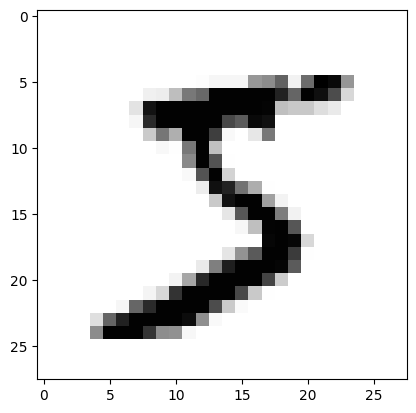

In [65]:
plt.imshow(x_train[0], cmap='Greys') # 흑백 이미지 출력
plt.show()

In [66]:
# 이미지 생성 원리 알고 싶어요.

for x in x_train[0]:
  for i in x:
    sys.stdout.write('%-3s'%i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [67]:
# 차원 변환 과정 실습

x_train = x_train.reshape(x_train.shape[0], 28*28) # 2차원 >> 1차원 배열 (784 = 28*28)
x_train = x_train.astype('float32') # 정수 >> 실수 / 정규화 시킬려고
x_train = x_train / 255 # 정규화 (명도 0~1 사이로 나타내기 위함) (영상 명도는 등급 0~255)

In [68]:
x_test = x_test.reshape(x_test.shape[0], 28*28).astype('float32') / 255

In [69]:
# 클래스(cls) 값 확인
print('class: %d'%y_train[0])

class: 5


In [70]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [71]:
# 이진화(binary) >> one=hot encoding

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [72]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [73]:
# 딥러닝 기본 프레임 만들기

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

In [74]:
# # Mnist data 불러오기

# (x_train,y_train),(x_test,y_test) = mnist.load_data()

# # 차원변환 후, 학습용 / 평가용 분리
# x_train = x_train.reshape(x_train.shape[0],784).astype('float32') / 255
# x_test = x_test.reshape(x_test.shape[0],784).astype('float32') / 255

# y_train = to_categorical(y_train,10)
# y_test = to_categorical(y_test,10)

# # 모델 구조 설정 (1차원 변환)
# model = Sequential()
# model.add(Dense(512, input_dim=784, activation='relu'))
# model.add(Dense(10, activation='softmax'))
# model.summary()

In [75]:
# # Mnist data 불러오기

# (x_train,y_train),(x_test,y_test) = mnist.load_data()

# # 차원변환 후, 학습용 / 평가용 분리
# x_train = x_train.reshape(x_train.shape[0],784).astype('float32') / 255
# x_test = x_test.reshape(x_test.shape[0],784).astype('float32') / 255

# y_train = to_categorical(y_train,10)
# y_test = to_categorical(y_test,10)

In [76]:
# Mnist data 불러오기

(x_train,y_train),(x_test,y_test) = mnist.load_data()

# 차원변환 후, 학습용 / 평가용 분리
x_train = x_train.reshape(x_train.shape[0],28,28,1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32') / 255

y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

In [77]:
# 컨볼루션 신경망 설정 (2차원: 특성 추출 >> 1차원 변환)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                 input_shape=(28,28,1), activation='relu')) # 28*28 image (흑백)
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten()) # 2차원 >> 1차원
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten_2 (Flatten)         (None, 9216)              0         
                                                                 
 dense_10 (Dense)            (None, 128)               1179776   
                                                      

In [78]:
'''
1. conv2d (Conv2D)
입력값 (28,28,1) # (가로, 세로, 채널) # 채널 1: 흑백, 3 : 컬러(r,g,b)
filter(kernel) (3,3) / 32개 >> 32개 결과물
bias(편향) 필터 개수와 동일하게 32개
파라미터 계산 : (3*3*1*32) + 32 = 320

2. conv2d_1 (Conv2D)
입력값 (26,26,32) # (가로, 세로, 채널) # 채널 1: 흑백, 3 : 컬러(r,g,b)
filter(kernel) (3,3) / 64개 >> 64개 결과물
bias(편향) 필터 개수와 동일하게 64개
파라미터 계산 : (3*3*32*64) + 64 = 18,496

3.  max_pooling2d
입력값 (26,26,64)
filter(kernel) (2,2)
출력값 (12,12,64)

4. dropout : 무작위 네트워크 꺼줌(변화 없음)

5. flatten
입력값 (12,12,64)
출력값 (12*12*64) = 9216

6. dense_6 (Dense)
입력값 9216
뉴런 수 128
9216 * 128 + 128(bias) = 1,179,776

7. dropout_1 (Dropout) : 무작위 네트워크 꺼줌(변화 없음)

8. dense_7 (Dense)
입력값 128
뉴런 수 10
128 * 10 + 10(bias) = 1290
'''

'\n1. conv2d (Conv2D)\n입력값 (28,28,1) # (가로, 세로, 채널) # 채널 1: 흑백, 3 : 컬러(r,g,b)\nfilter(kernel) (3,3) / 32개 >> 32개 결과물\nbias(편향) 필터 개수와 동일하게 32개\n파라미터 계산 : (3*3*1*32) + 32 = 320\n\n2. conv2d_1 (Conv2D)\n입력값 (26,26,32) # (가로, 세로, 채널) # 채널 1: 흑백, 3 : 컬러(r,g,b)\nfilter(kernel) (3,3) / 64개 >> 64개 결과물\nbias(편향) 필터 개수와 동일하게 64개\n파라미터 계산 : (3*3*32*64) + 64 = 18,496\n\n3.  max_pooling2d\n입력값 (26,26,64)\nfilter(kernel) (2,2)\n출력값 (12,12,64)\n\n4. dropout : 무작위 네트워크 꺼줌(변화 없음)\n\n5. flatten\n입력값 (12,12,64)\n출력값 (12*12*64) = 9216\n\n6. dense_6 (Dense)\n입력값 9216\n뉴런 수 128\n9216 * 128 + 128(bias) = 1,179,776\n\n7. dropout_1 (Dropout) : 무작위 네트워크 꺼줌(변화 없음)\n\n8. dense_7 (Dense)\n입력값 128\n뉴런 수 10\n128 * 10 + 10(bias) = 1290\n'

In [79]:
%pwd

'/content'

In [80]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 구역 설정
MODEL_DIR = '/content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = '/content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
earlystopping = EarlyStopping(monitor='val_loss', patience=10)

In [81]:
# 모델 실행
history = \
model.fit(x_train, y_train, validation_split=0.25, epochs=30,
          batch_size=200, verbose=0, callbacks=[earlystopping, checkpointer])


Epoch 1: val_loss improved from inf to 0.08229, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.08229 to 0.05922, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 3: val_loss improved from 0.05922 to 0.05586, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 4: val_loss improved from 0.05586 to 0.04637, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 5: val_loss improved from 0.04637 to 0.04355, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 6: val_loss did not improve from 0.04355

Epoch 7: val_loss did not improve from 0.04355

Epoch 8: val_loss improved from 0.04355 to 0.04251, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 9: val_loss improved from 0.04251 to 0.03980, saving model to /content/drive/MyDrive/mulcam_bigdata/data/DL_Data/temp/model/mnist_conv2D.hdf5

Epoch 10:

In [82]:
# 테스트 정확도
print('\n Test Dataset ACC: %.4f'%(model.evaluate(x_test,y_test)[1]))

313/313 [==============================] - 6s 20ms/step - loss: 0.0277 - accuracy: 0.9929

 Test Dataset ACC: 0.9929


In [83]:
import numpy as np

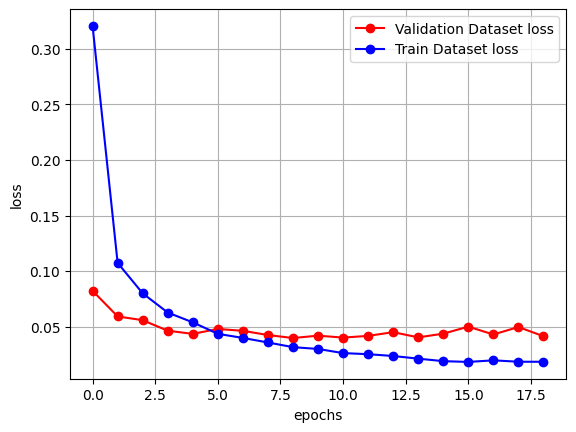

In [84]:
# 학습용 데이터 셋 / 평가용 데이터 셋 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Validation Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend()
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()